In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,r2_score
sns.set_style("darkgrid")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

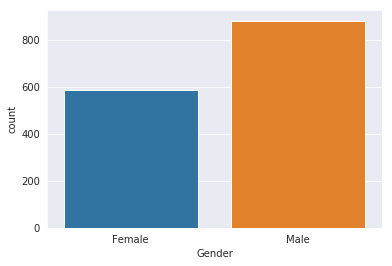

In [5]:
sns.countplot(df['Gender'])

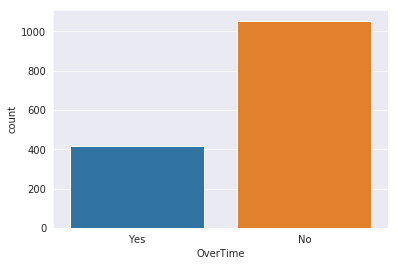

In [6]:
sns.countplot(df['OverTime'])

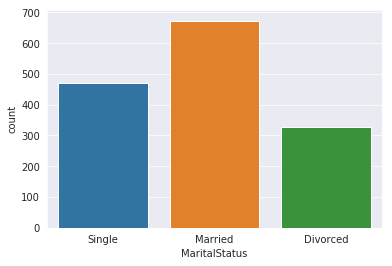

In [7]:
sns.countplot(df['MaritalStatus'])

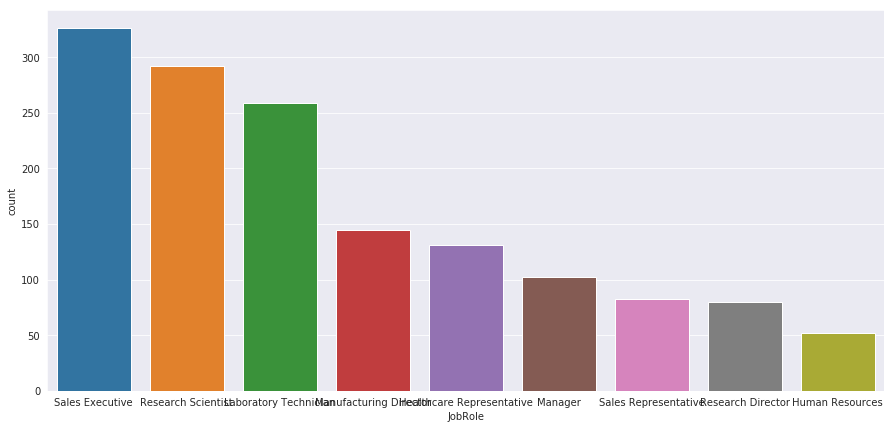

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(df['JobRole'])

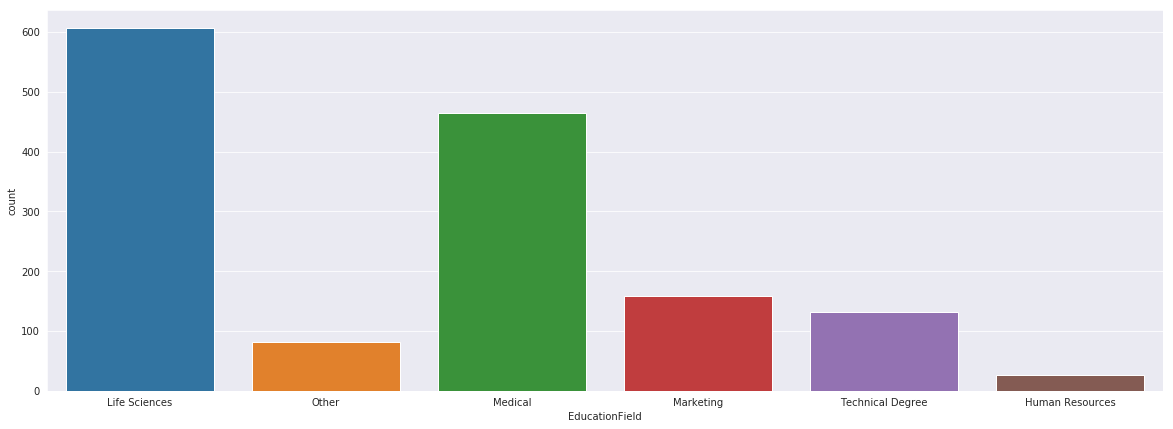

In [9]:
plt.figure(figsize=(20,7))
sns.countplot(df['EducationField'])

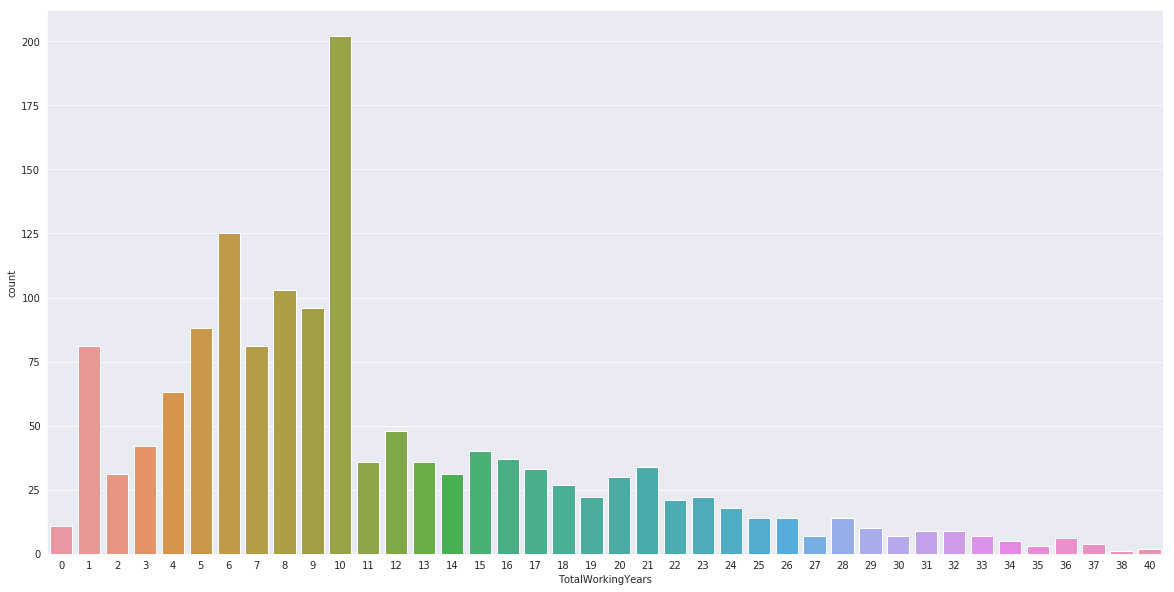

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(df['TotalWorkingYears'])

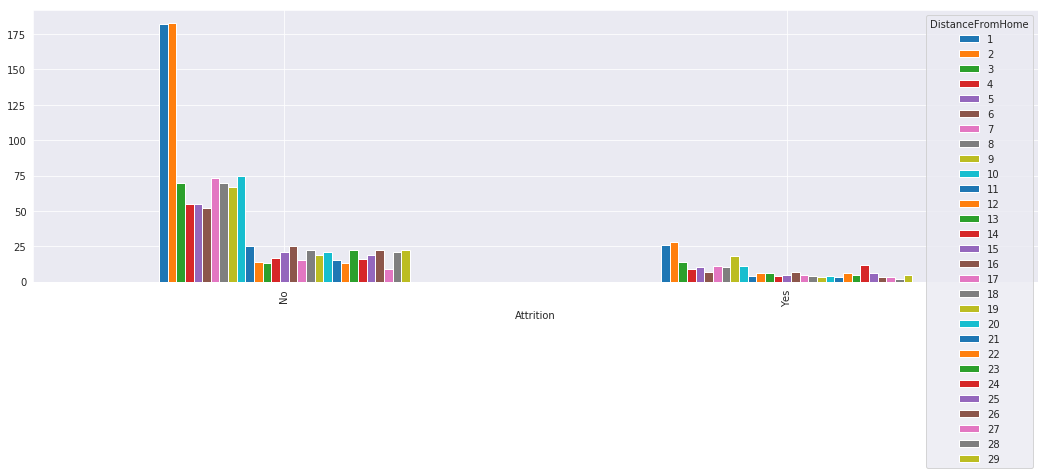

In [11]:
pd.crosstab(df['Attrition'],df['DistanceFromHome']).plot.bar(figsize=(18,5))
# sns.countplot(df.DistanceFromHome)

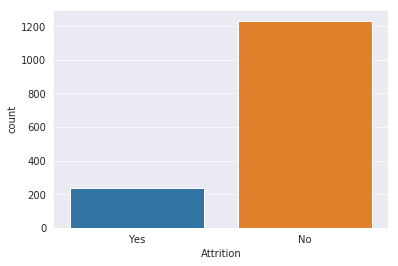

In [12]:
sns.countplot(df['Attrition'])

In [13]:
en = LabelEncoder()
df['Age'] = en.fit_transform(df['Age'])
df['BusinessTravel'] = en.fit_transform(df['BusinessTravel'])
df['DailyRate'] = en.fit_transform(df['DailyRate'])
df['Department'] = en.fit_transform(df['Department'])
df['EducationField'] = en.fit_transform(df['EducationField'])
df['JobRole'] = en.fit_transform(df['JobRole'])
df['MaritalStatus'] = en.fit_transform(df['MaritalStatus'])
df['Attrition'] = en.fit_transform(df['Attrition'])
df['OverTime'] = en.fit_transform(df['OverTime'])
df['Over18'] = en.fit_transform(df['Over18'])
df['Gender'] = en.fit_transform(df['Gender'])

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,31,0,1,113,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,19,1,2,805,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,15,0,1,820,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,9,0,2,312,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = []

In [16]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_predict = log.predict(X_test)
model.append(["LogisticRegression",accuracy_score(y_predict,y_test)])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
log = DecisionTreeClassifier()
log.fit(X_train,y_train)
y_predict = log.predict(X_test)
model.append(["DecisionTreeClassifier",accuracy_score(y_predict,y_test)])

In [18]:
log = ExtraTreesClassifier()
log.fit(X_train,y_train)
y_predict = log.predict(X_test)
model.append(["ExtraTreesClassifier",accuracy_score(y_predict,y_test)])

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
log = KNeighborsClassifier()
log.fit(X_train,y_train)
y_predict = log.predict(X_test)
model.append(["KNeighborsClassifier",accuracy_score(y_predict,y_test)])

In [20]:
log = GaussianNB()
log.fit(X_train,y_train)
y_predict = log.predict(X_test)
model.append(["GaussianNB",accuracy_score(y_predict,y_test)])

In [21]:
model = pd.DataFrame(model)
model.columns = ["Name","Score"]

In [22]:

model.sort_values(by="Score",ascending=False)

,Name,Score
2,ExtraTreesClassifier,0.876543
0,LogisticRegression,0.868313
3,KNeighborsClassifier,0.868313
1,DecisionTreeClassifier,0.806584
4,GaussianNB,0.769547
